1. Entender a Distribuição dos Votos finais totais entre os Candidatos


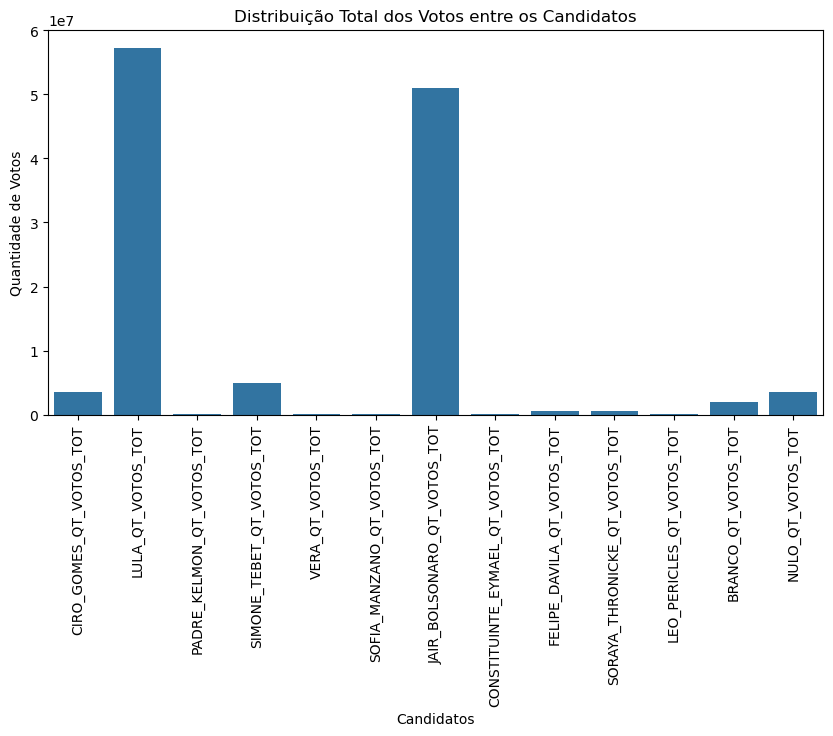

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../totalizacao-de-votos-primeiro-turno-2022.csv', delimiter=';')

votos_candidatos = [col for col in data.columns if '_QT_VOTOS_TOT' in col and 'ACUMULADO' not in col]

total_votos = data[votos_candidatos].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=total_votos.index, y=total_votos.values)
plt.title('Distribuição Total dos Votos entre os Candidatos')
plt.xlabel('Candidatos')
plt.ylabel('Quantidade de Votos')
plt.xticks(rotation=90)
plt.show()


2. Identificar Padrões e Tendências nos Dados de Votação

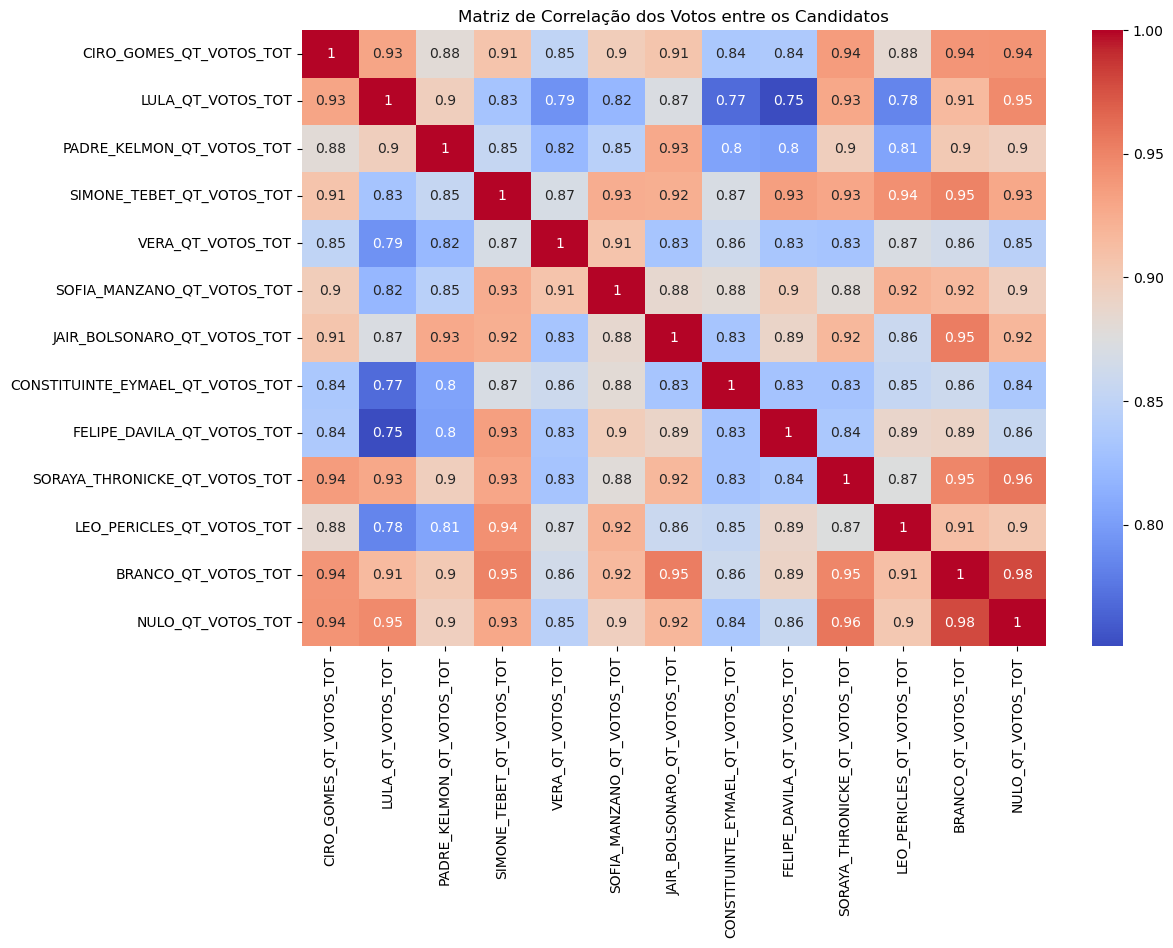

In [8]:
# Matriz de correlação
correlation_matrix = data[votos_candidatos].corr()

# Heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação dos Votos entre os Candidatos')
plt.show()


3. Determinar a Necessidade de Limpeza e Transformação dos Dados

In [29]:
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('../totalizacao-de-votos-primeiro-turno-2022.csv', delimiter=';')

votos_candidatos = [col for col in data.columns if '_QT_VOTOS_TOT' in col and 'ACUMULADO' not in col]

# Converter campos de percentuais de string para float
percent_columns = [col for col in data.columns if '_PE_VOTOS_TOT_ACUMULADO' in col or 'PE_SECOES_TOT_ACUMULADO' in col]
for col in percent_columns:
    data[col] = data[col].str.replace(',', '.').astype(float)

print("Valores Nulos por Coluna:")
null_values = data.isnull().sum().sort_values()

if null_values.sum() == 0:
    print("  Nenhum valor nulo encontrado.")
else:
    print(f"   {null_values.loc[null_values > 0]}")


# Normalizar os dados de votos totais
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[votos_candidatos] = scaler.fit_transform(data[votos_candidatos])

# Visualizar os dados normalizados (primeiras 5 linhas)
print("Dados Normalizados (primeiras 5 linhas):")
print(f"  {data_normalized.head()}")


Valores Nulos por Coluna:
  Nenhum valor nulo encontrado.
Dados Normalizados (primeiras 5 linhas):
     DT_TOTALIZACAO       QT_SECOES_TOTAL  QT_APTOS_TOTAL  QT_SECOES_TOT  \
0  02/10/2022 17:04:47           472075       156454011            191   
1  02/10/2022 17:04:48           472075       156454011            263   
2  02/10/2022 17:04:51           472075       156454011              1   
3  02/10/2022 17:06:50           472075       156454011              1   
4  02/10/2022 17:06:51           472075       156454011              1   

   QT_SECOES_TOT_ACUMULADO  PE_SECOES_TOT_ACUMULADO                        \
0                      191                                       0.000405   
1                      454                                       0.000962   
2                      455                                       0.000964   
3                      456                                       0.000966   
4                      457                                       0.00